<a href="https://colab.research.google.com/github/jokefun022/Google-Colab/blob/main/5_My_Project_Related.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the main dataset
tweets_df = pd.read_csv('/content/emoji_cleaned.csv')  # Replace with your file path

# Load the emoji mapping file
mapping_df = pd.read_csv('/content/us_mapping.txt', header=None, names=['Label', 'Emoji', 'Description'])


In [ ]:
tweets_df = pd.read_csv('emoji_cleaned.csv')  # Load main dataset
print(tweets_df.head())  # Show data preview

mapping_df = pd.read_csv('us_mapping.txt', sep='\t', header=None, names=['Label', 'Emoji', 'Description'])  # Load mapping dataset
print(mapping_df.head())  # Show mapping preview


                                               Tweet  Label
0  a little throwback with my favourite person  w...      0
1  glam on  yesterday for kcon makeup using  in f...      7
2  democracy plaza in the wake of a stunning outc...     11
3       then amp now vilo  walt disney magic kingdom      0
4                   who never  a galaxy far far away      2
  Label                         Emoji  Description
0    ❤️                     Red heart          NaN
1     😍   Smiling face with hearteyes          NaN
2     😂        Face with tears of joy          NaN
3     💕                    Two hearts          NaN
4     🔥                          Fire          NaN


                                               Tweet Label Emoji  Description
0  a little throwback with my favourite person  w...     0   NaN          NaN
1  glam on  yesterday for kcon makeup using  in f...     7   NaN          NaN
2  democracy plaza in the wake of a stunning outc...    11   NaN          NaN
3       then amp now vilo  walt disney magic kingdom     0   NaN          NaN
4                   who never  a galaxy far far away     2   NaN          NaN


<ipython-input-23-a2cbb4bd8b97>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=tweets_df, palette='plasma')


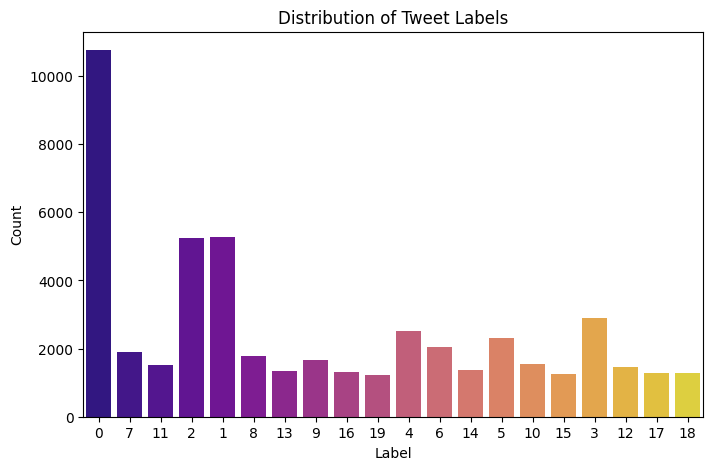

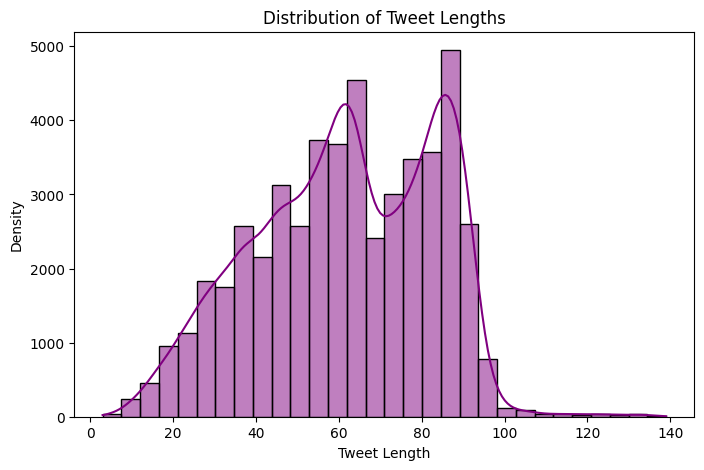

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main dataset
tweets_df = pd.read_csv('emoji_cleaned.csv')  # Replace with your file path

# Load the emoji mapping file
mapping_df = pd.read_csv('us_mapping.txt', sep='\t', header=None, names=['Label', 'Emoji', 'Description'])

# Convert 'Label' column in both DataFrames to the same data type (e.g., string)
tweets_df['Label'] = tweets_df['Label'].astype(str)
mapping_df['Label'] = mapping_df['Label'].astype(str)

# Merge datasets on 'Label'
tweets_df = tweets_df.merge(mapping_df, on='Label', how='left')

# Display merged dataset
print(tweets_df.head())

# Visualize label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=tweets_df, palette='plasma')
plt.title('Distribution of Tweet Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualize tweet length distribution
# Handle missing or float values in 'Tweet' column
tweets_df['Length'] = tweets_df['Tweet'].astype(str).apply(len)  # Convert to string before applying len
# Alternatively, you can use:
# tweets_df['Length'] = tweets_df['Tweet'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

plt.figure(figsize=(8, 5))
sns.histplot(tweets_df['Length'], kde=True, color='purple', bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()

In [ ]:
# Prepare features and labels
X = tweets_df['Tweet'].fillna('')  # Replace NaN values with empty strings
y = tweets_df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train a Multinomial Naive Bayes model
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_clf.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.88      0.39      2152
           1       0.23      0.14      0.17      1056
          10       0.28      0.02      0.04       309
          11       0.61      0.25      0.36       306
          12       0.46      0.17      0.24       293
          13       0.00      0.00      0.00       269
          14       0.00      0.00      0.00       275
          15       0.33      0.01      0.02       250
          16       0.00      0.00      0.00       261
          17       0.71      0.31      0.43       256
          18       0.25      0.01      0.02       257
          19       0.00      0.00      0.00       243
           2       0.37      0.44      0.40      1048
           3       0.12      0.01      0.01       577
           4       0.48      0.21      0.30       503
           5       0.14      0.00      0.00       463
           6       0.35      0.02      0.03       410
   

In [ ]:
# Save the model
joblib.dump(nb_clf, 'emoji_predictor.pkl')

# Load the model for later use
loaded_model = joblib.load('emoji_predictor.pkl')


In [ ]:
emoji = emoji_row['Emoji'].values[0]
description = emoji_row['Description'].values[0]

NameError: name 'emoji_row' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Function to predict emoji for a single tweet
def predict_emoji(tweet, model, vectorizer, mapping_df):
    tweet_tfidf = vectorizer.transform([tweet])
    label = model.predict(tweet_tfidf)[0]

    # Check if the label exists in the mapping DataFrame
    if label in mapping_df['Label'].values:  # Check if label is present
        emoji_row = mapping_df[mapping_df['Label'] == label]
        emoji = emoji_row['Emoji'].values[0]
        description = emoji_row['Description'].values[0]
        return emoji, description
    else:
        return "❓", "Unknown Emoji"  # Return a default emoji if not found

In [ ]:
emoji = emoji_row['Emoji'].values[0]
description = emoji_row['Description'].values[0]

NameError: name 'emoji_row' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Function to predict emoji for a single tweet
def predict_emoji(tweet, model, vectorizer, mapping_df):
    tweet_tfidf = vectorizer.transform([tweet])
    label = model.predict(tweet_tfidf)[0]

    # Check if the label exists in the mapping DataFrame
    if label in mapping_df['Label'].values:  # Check if label is present
        emoji_row = mapping_df[mapping_df['Label'] == label]
        emoji = emoji_row['Emoji'].values[0]
        description = emoji_row['Description'].values[0]
        return emoji, description
    else:
        return "❓", "Unknown Emoji"  # Return a default emoji if not found

# Example prediction
new_tweet = "Feeling happy with life!"
predicted_emoji, emoji_description = predict_emoji(new_tweet, nb_clf, tfidf, mapping_df)
# Assuming nb_clf, tfidf, and mapping_df are defined
print(f"Tweet: {new_tweet}")
print(f"Predicted Emoji: {predicted_emoji}")
print(f"Description: {emoji_description}")

# Now you can access the emoji and description:
print(predicted_emoji)  # This will print the predicted emoji
print(emoji_description) # This will print the description

Tweet: Feeling happy with life!
Predicted Emoji: ❓
Description: Unknown Emoji
❓
Unknown Emoji
